In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('airline-safety.csv')

In [3]:
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [4]:
df.nunique()

airline                   56
avail_seat_km_per_week    56
incidents_85_99           19
fatal_accidents_85_99     11
fatalities_85_99          38
incidents_00_14           14
fatal_accidents_00_14      4
fatalities_00_14          23
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [6]:
df.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [7]:
df.isnull().sum()

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

In [8]:
df.corr()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
avail_seat_km_per_week,1.000000,0.279538,0.468300,0.209835,0.725917,0.375673,0.228484
incidents_85_99,0.279538,1.000000,0.856991,0.274394,0.403009,0.390249,0.195337
fatal_accidents_85_99,0.468300,0.856991,1.000000,0.540866,0.572923,0.498758,0.186985
fatalities_85_99,0.209835,0.274394,0.540866,1.000000,0.273696,0.228180,0.046979
incidents_00_14,0.725917,0.403009,0.572923,0.273696,1.000000,0.598071,0.282009
fatal_accidents_00_14,0.375673,0.390249,0.498758,0.228180,0.598071,1.000000,0.695864
fatalities_00_14,0.228484,0.195337,0.186985,0.046979,0.282009,0.695864,1.000000


<AxesSubplot:>

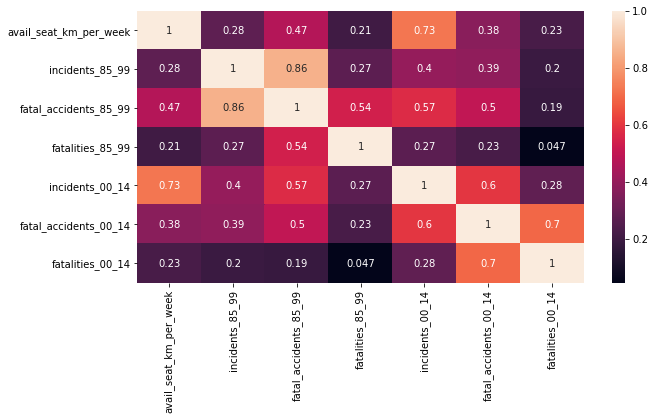

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

### Exploratory Data Analysis

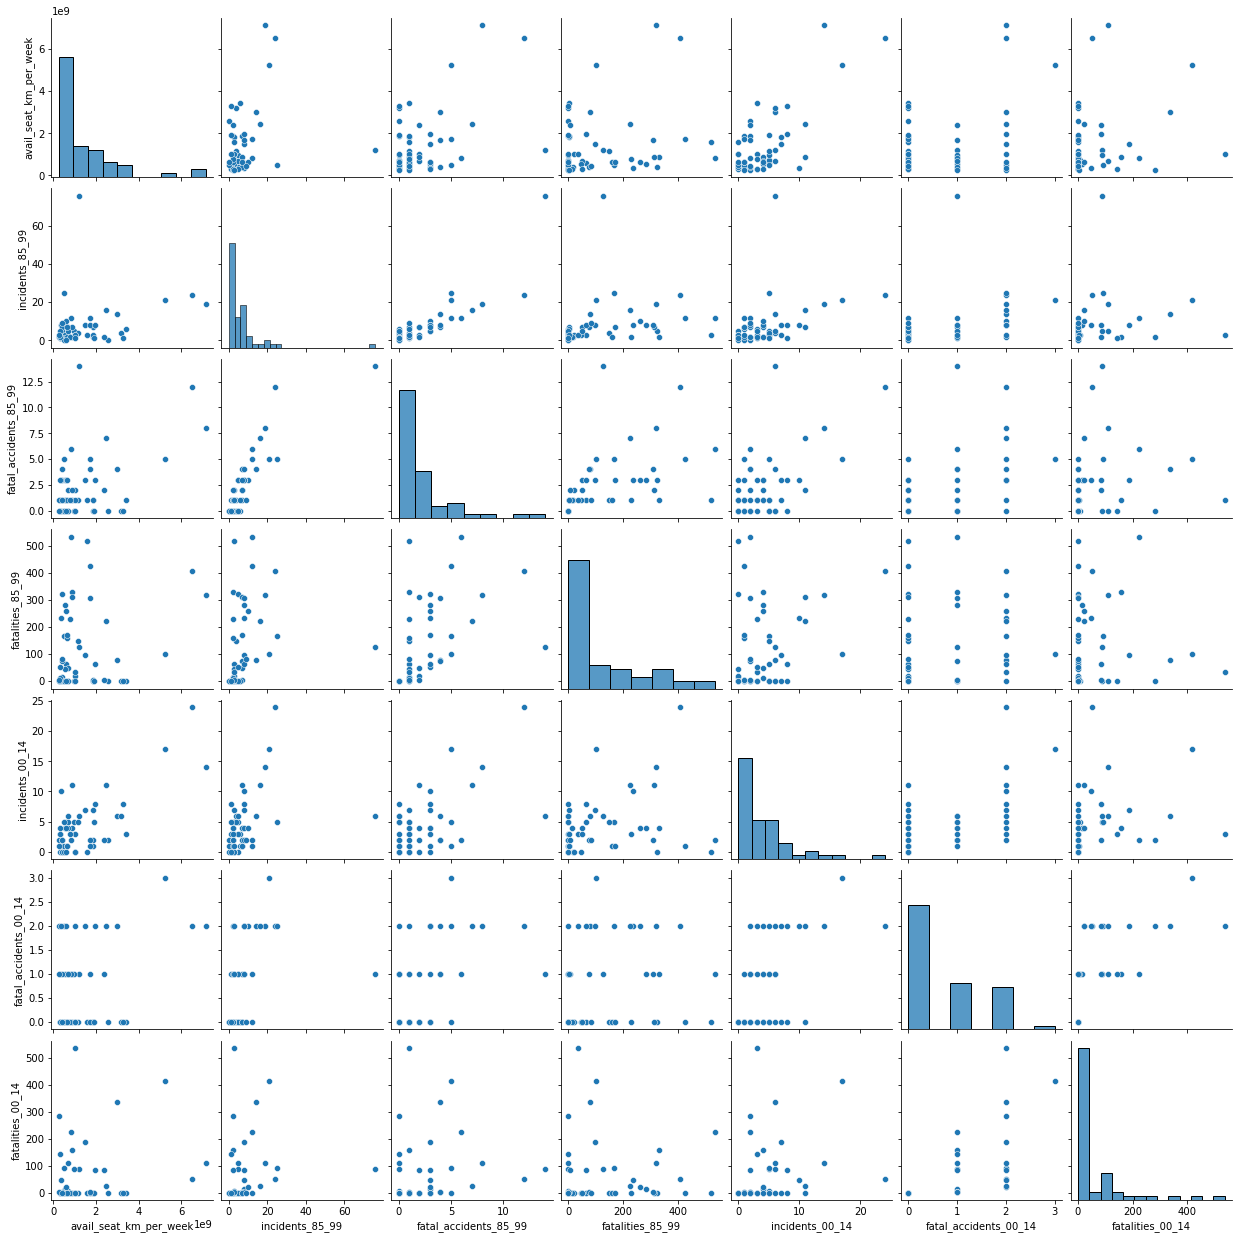

In [10]:
sns.pairplot(data=df)

In [78]:
air_km = df.groupby('airline').sum()['avail_seat_km_per_week'].sort_values(ascending=False).reset_index()
air_km.head()

,airline,avail_seat_km_per_week
0,United / Continental*,7139291291
1,Delta / Northwest*,6525658894
2,American*,5228357340
3,Lufthansa*,3426529504
4,Southwest Airlines,3276525770


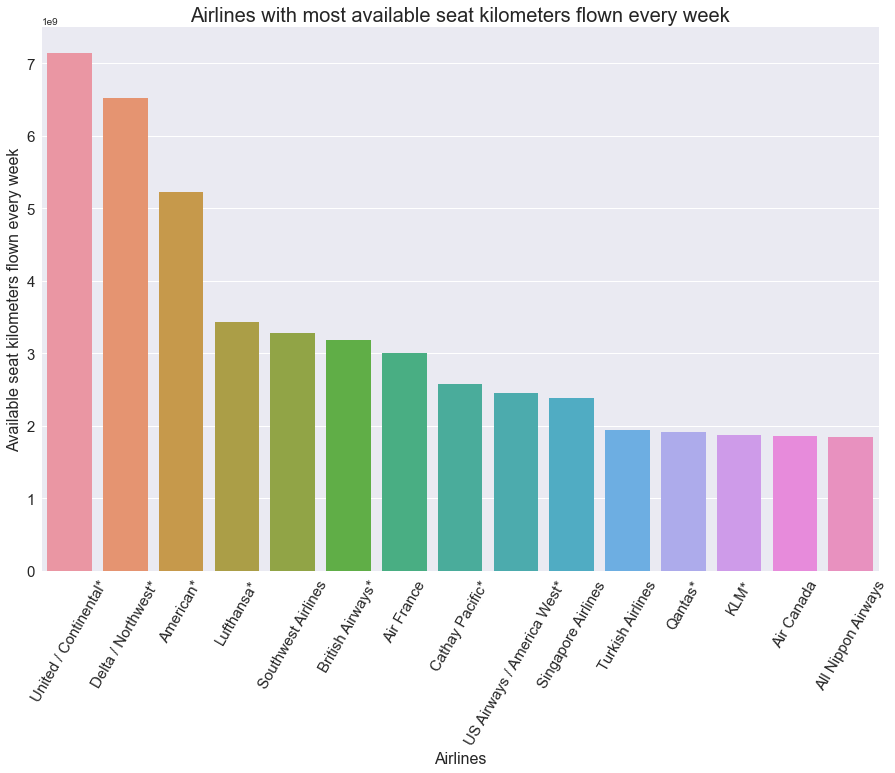

In [55]:
plt.figure(figsize=(15,10))
plt.title('Airlines with most available seat kilometers flown every week',fontsize=20)
sns.barplot(x = 'airline',y = 'avail_seat_km_per_week', data = air_km.head(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel('Airlines',fontsize=16)
plt.ylabel('Available seat kilometers flown every week',fontsize=16)
plt.show()

### Working on data from 1985-1999

<AxesSubplot:xlabel='incidents_85_99', ylabel='count'>

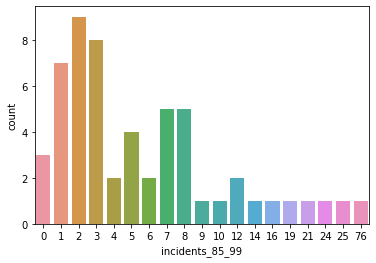

In [11]:
sns.countplot(x='incidents_85_99',data=df)

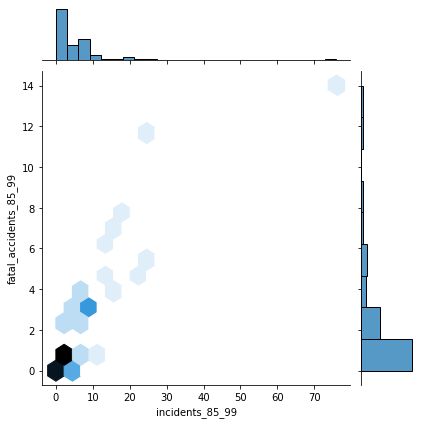

In [12]:
sns.jointplot(x='incidents_85_99',data = df,y= 'fatal_accidents_85_99',kind='hex')

In [60]:
airline_inc = df.groupby('airline').sum()['incidents_85_99'].sort_values(ascending=False).reset_index()
airline_inc.head(10)

,airline,incidents_85_99
0,Aeroflot*,76
1,Ethiopian Airlines,25
2,Delta / Northwest*,24
3,American*,21
4,United / Continental*,19
5,US Airways / America West*,16
6,Air France,14
7,Korean Air,12
8,China Airlines,12
9,Garuda Indonesia,10


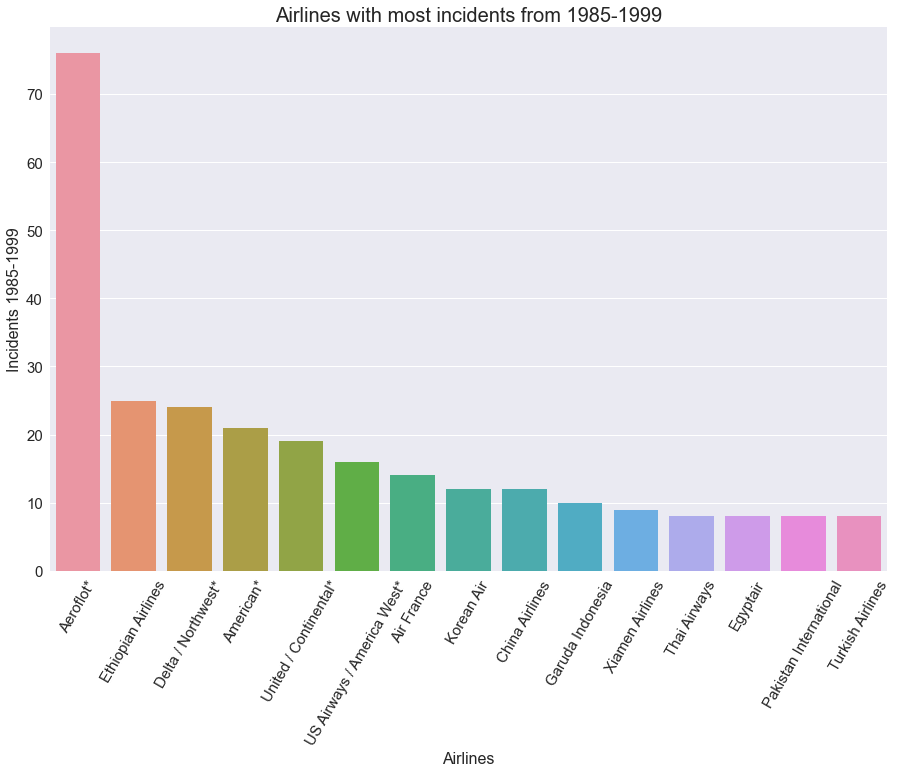

In [57]:
plt.figure(figsize=(15,10))
plt.title('Airlines with most incidents from 1985-1999',fontsize=20)
sns.barplot(x = 'airline',y = 'incidents_85_99', data = airline_inc.head(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel('Airlines',fontsize=16)
plt.ylabel('Incidents 1985-1999',fontsize=16)
plt.show()

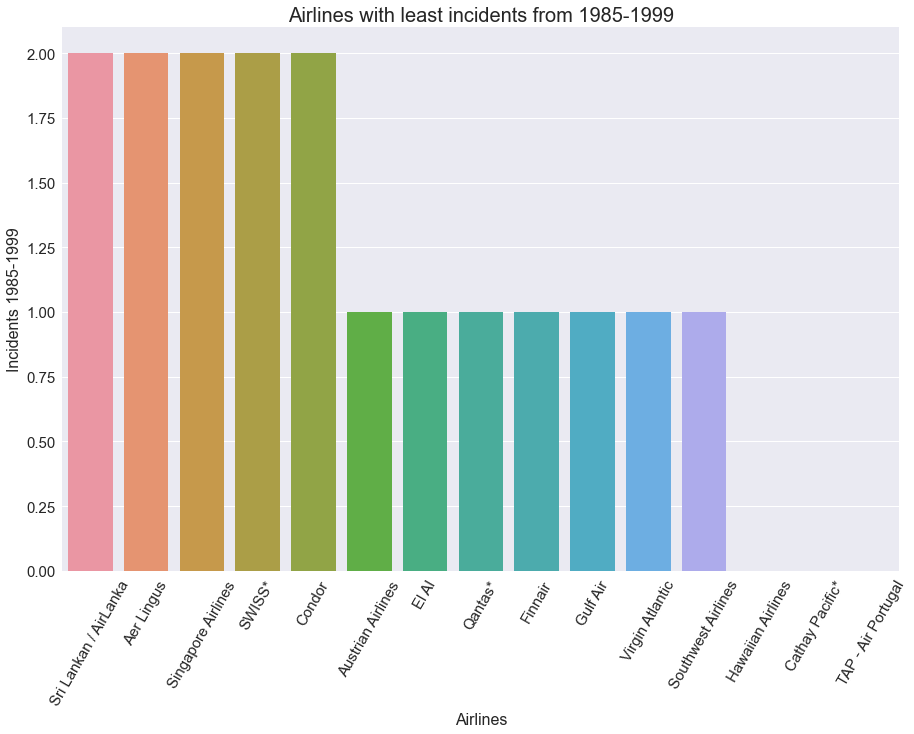

In [58]:
plt.figure(figsize=(15, 10))
plt.title('Airlines with least incidents from 1985-1999', fontsize=20)
sns.barplot(
    x='airline', y='incidents_85_99',
    data=airline_inc.tail(15))  #printing first 15 highest profitable states
plt.xticks(rotation=60, fontsize=15)  #rotating the labels on x-axis
plt.yticks(fontsize=15)
plt.xlabel('Airlines', fontsize=16)
plt.ylabel('Incidents 1985-1999', fontsize=16)
plt.show()

**During 1985-1999** , 
- The airlines where most incidents occur are - 1)Aeroflot 2)Ethiopian Airlines 3)Delta / Northwest*
- The airlines where least incidents occur are - Southwest Airlines,Virginic Atlantic,Gulf Air,Finnair
- The airlines where no incidents occur are - Hawaiian Airlines,Cathay Pacific,TAP-Air Portugal

In [84]:
air_fatal = df.groupby('airline').sum()['fatal_accidents_85_99'].sort_values(ascending=False).reset_index()
air_fatal.head(20)


,airline,fatal_accidents_85_99
0,Aeroflot*,14
1,Delta / Northwest*,12
2,United / Continental*,8
3,US Airways / America West*,7
4,China Airlines,6
5,Ethiopian Airlines,5
6,Korean Air,5
7,American*,5
8,Air France,4
9,Thai Airways,4


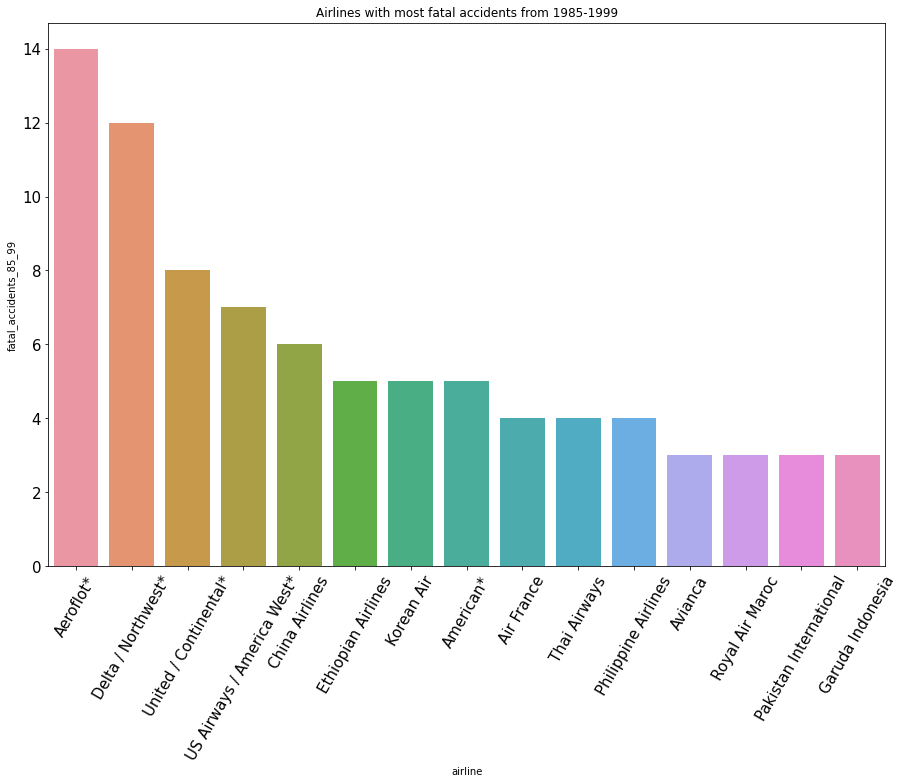

In [17]:
plt.figure(figsize=(15,10))
plt.title('Airlines with most fatal accidents from 1985-1999')
sns.barplot(x = 'airline',y = 'fatal_accidents_85_99', data = air_fatal.head(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.show()

**During 1985-1999** , 
- The airlines where most fatal accidents occur are - 1)Aeroflot 2)Delta / Northwest 3)United / Continental


In [18]:
df.nunique()

airline                   56
avail_seat_km_per_week    56
incidents_85_99           19
fatal_accidents_85_99     11
fatalities_85_99          38
incidents_00_14           14
fatal_accidents_00_14      4
fatalities_00_14          23
dtype: int64

In [85]:
fatal_inc = df.groupby('airline').sum()['fatalities_85_99'].sort_values(ascending=False).reset_index()
fatal_inc.head(20)

,airline,fatalities_85_99
0,China Airlines,535
1,Japan Airlines,520
2,Korean Air,425
3,Delta / Northwest*,407
4,Air India*,329
5,Avianca,323
6,United / Continental*,319
7,Saudi Arabian,313
8,Thai Airways,308
9,Egyptair,282


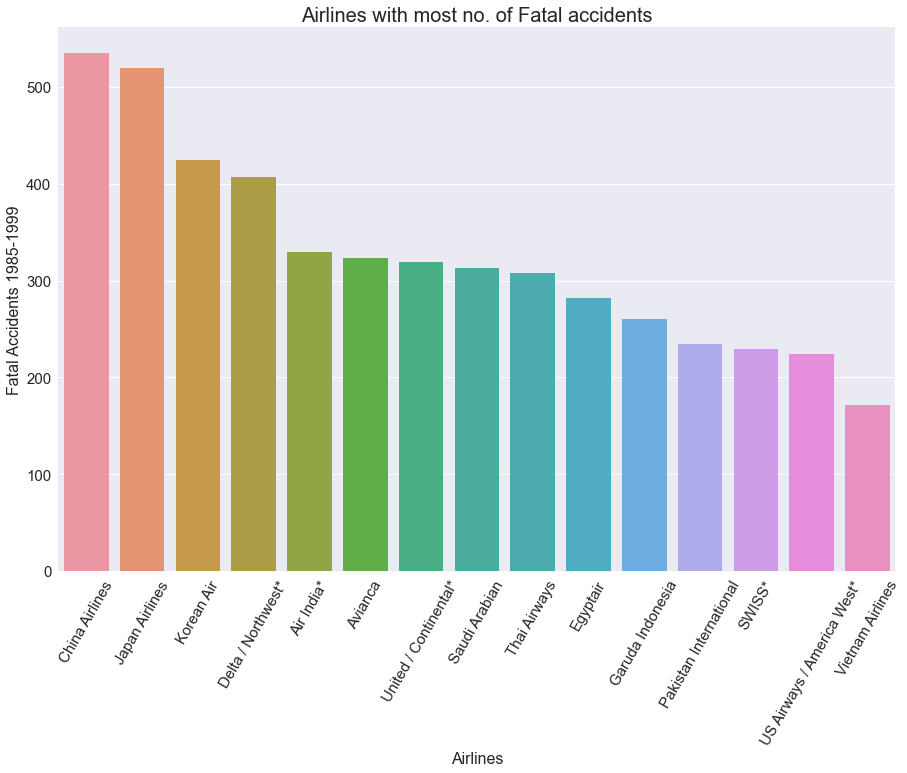

In [63]:
plt.figure(figsize=(15,10))
plt.title('Airlines with most no. of Fatal accidents',fontsize = 20)
sns.barplot(x = 'airline',y = 'fatalities_85_99', data = fatal_inc.head(15))
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel('Airlines',fontsize=16)
plt.ylabel('Fatal Accidents 1985-1999',fontsize=16)
plt.show()

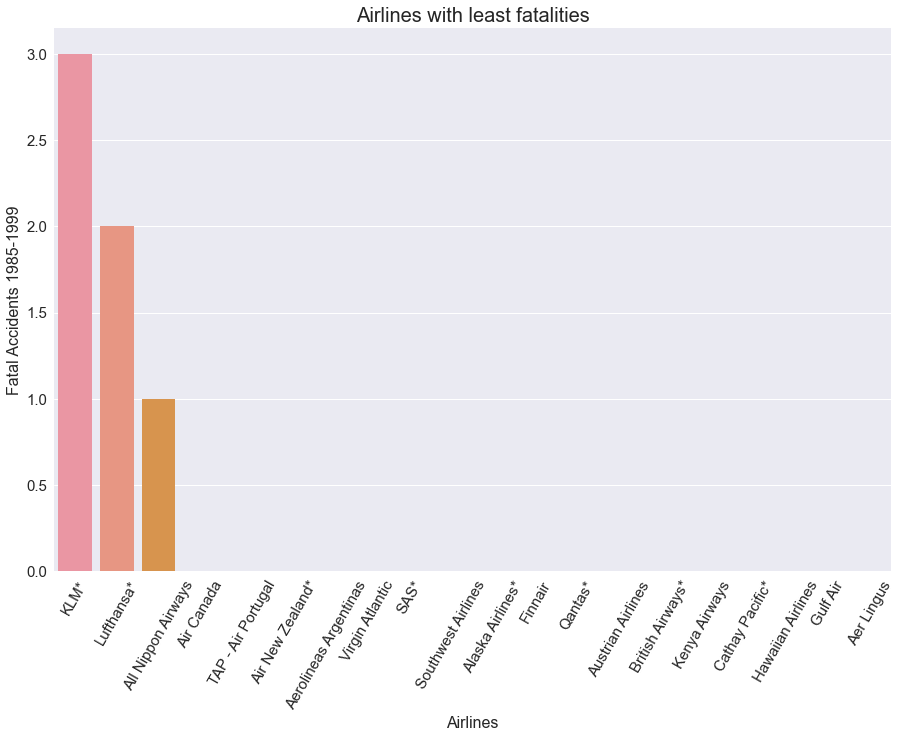

In [65]:
plt.figure(figsize=(15,10))
plt.title('Airlines with least fatalities', fontsize=20)
sns.barplot(x = 'airline',y = 'fatalities_85_99', data = fatal_inc.tail(20))
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel('Airlines',fontsize=16)
plt.ylabel('Fatal Accidents 1985-1999',fontsize=16)
plt.show()

**During 1985-1999** , 
- The airlines where most fatalities occur are - 1)China Airlines 2)Japan Airlines 3)Korea Air*
- The airlines where least fatalities occur are - Air Canada, TAP-Air Porrtugal,etc(Total 18)


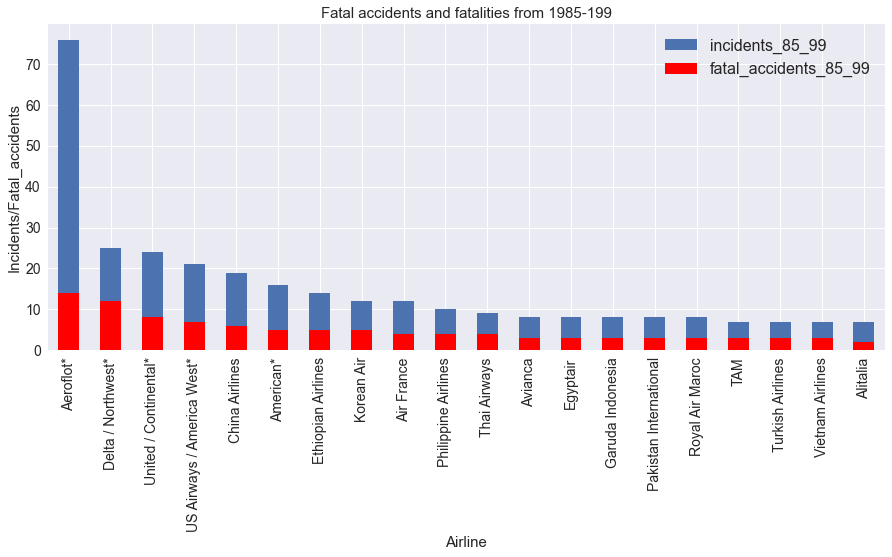

In [67]:
air_fatal_a = df.groupby('airline').incidents_85_99.sum().nlargest(n=20)
air_fatal_i = df.groupby("airline").fatal_accidents_85_99.sum().nlargest(n=20)

# plotting to see it visually
plt.style.use('seaborn')
air_fatal_a.plot(kind='bar', figsize=(15, 6), fontsize=14)
air_fatal_i.plot(kind='bar', figsize=(15, 6), fontsize=14, color='red')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Incidents/Fatal_accidents', fontsize=15)
plt.title("Incidents and fatal accidents from 1985-199", fontsize=15)
plt.legend(fontsize=16)
plt.show()

### Working on data from 2000-2014

<AxesSubplot:xlabel='incidents_00_14', ylabel='count'>

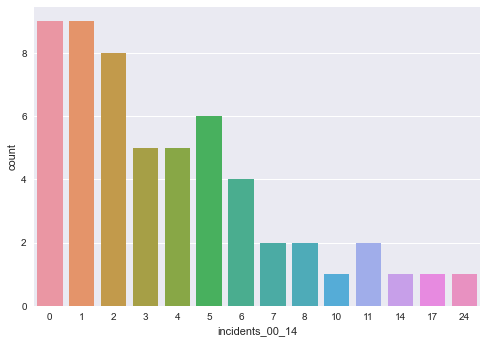

In [25]:
sns.countplot(x='incidents_00_14',data=df)

In [69]:
airline_inc_2 = df.groupby('airline').sum()['incidents_00_14'].sort_values(ascending=False).reset_index()
airline_inc_2.head(10)

,airline,incidents_00_14
0,Delta / Northwest*,24
1,American*,17
2,United / Continental*,14
3,US Airways / America West*,11
4,Saudi Arabian,11
5,Pakistan International,10
6,Southwest Airlines,8
7,Turkish Airlines,8
8,TAM,7
9,All Nippon Airways,7


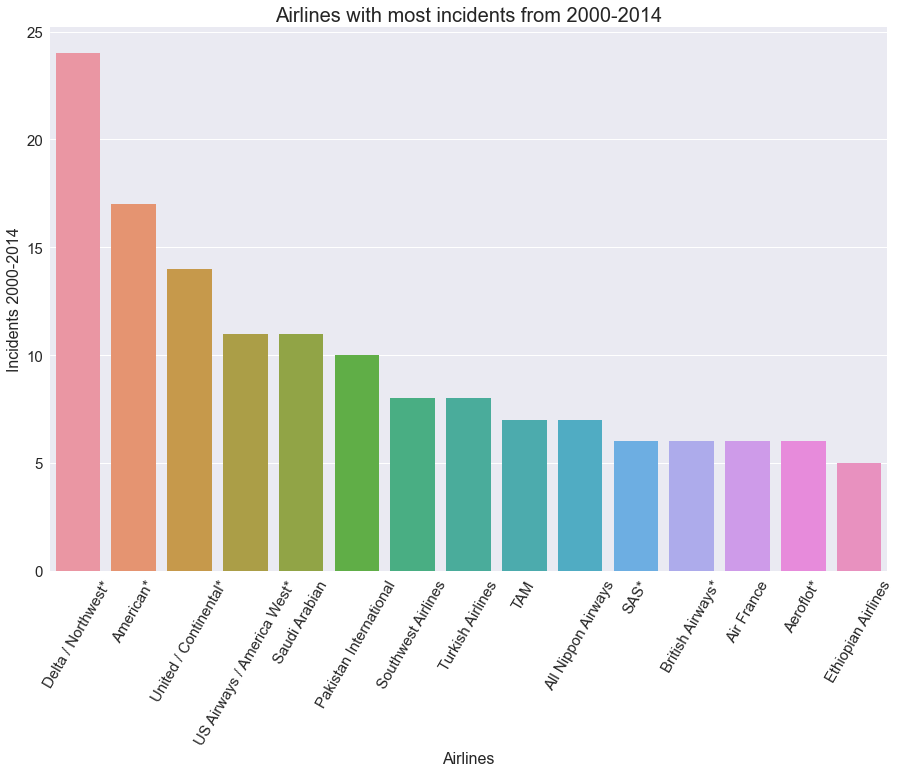

In [70]:
plt.figure(figsize=(15,10))
plt.title('Airlines with most incidents from 2000-2014',fontsize=20)
sns.barplot(x = 'airline',y = 'incidents_00_14', data = airline_inc_2.head(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel('Airlines',fontsize=16)
plt.ylabel('Incidents 2000-2014',fontsize=16)
plt.show()

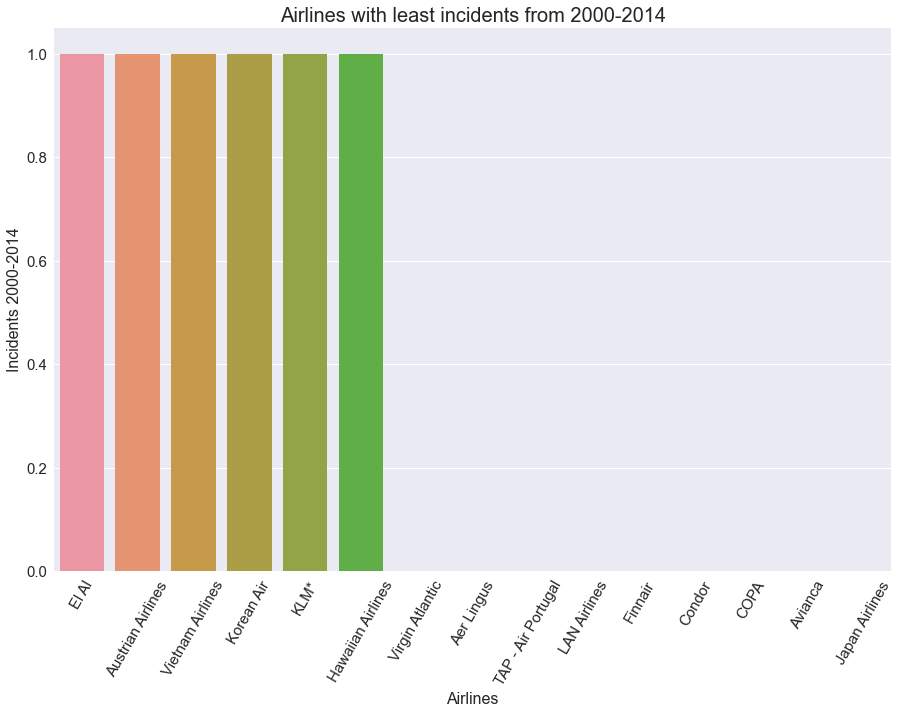

In [71]:
plt.figure(figsize=(15,10))
plt.title('Airlines with least incidents from 2000-2014',fontsize=20)
sns.barplot(x = 'airline',y = 'incidents_00_14', data = airline_inc_2.tail(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel('Airlines',fontsize=16)
plt.ylabel('Incidents 2000-2014',fontsize=16)
plt.show()

In [90]:
air_fatal_2 = df.groupby('airline').sum()['fatal_accidents_00_14'].sort_values(ascending=False).reset_index()
air_fatal_2.head(10)

,airline,fatal_accidents_00_14
0,American*,3
1,Malaysia Airlines,2
2,Delta / Northwest*,2
3,Ethiopian Airlines,2
4,TAM,2
5,Garuda Indonesia,2
6,Turkish Airlines,2
7,US Airways / America West*,2
8,Air France,2
9,United / Continental*,2


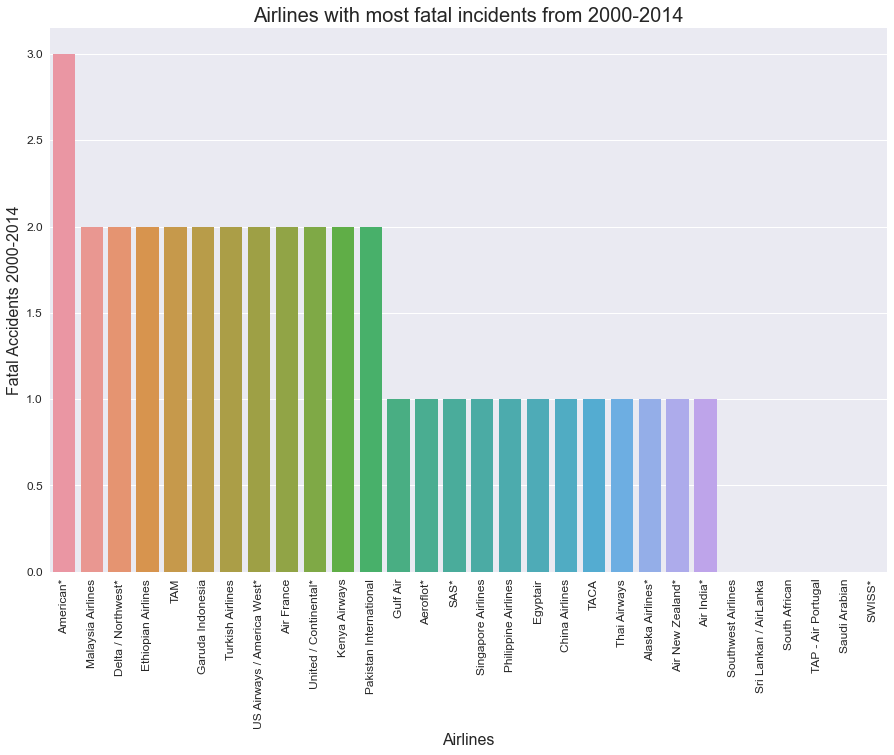

In [73]:
plt.figure(figsize=(15,10))
plt.title('Airlines with most fatal incidents from 2000-2014',fontsize=20)
sns.barplot(x = 'airline',y = 'fatal_accidents_00_14', data = air_fatal_2.head(30)) #printing first 15 highest profitable states
plt.xticks(rotation = 90 , fontsize = 12) #rotating the labels on x-axis 
plt.yticks(fontsize = 12) 
plt.xlabel('Airlines',fontsize=16)
plt.ylabel('Fatal Accidents 2000-2014',fontsize=16)
plt.show()

In [75]:
fatal_inc_2 = df.groupby('airline').sum()['fatalities_00_14'].sort_values(ascending=False).reset_index()
fatal_inc_2.head(10)

,airline,fatalities_00_14
0,Malaysia Airlines,537
1,American*,416
2,Air France,337
3,Kenya Airways,283
4,China Airlines,225
5,TAM,188
6,Air India*,158
7,Gulf Air,143
8,SAS*,110
9,United / Continental*,109


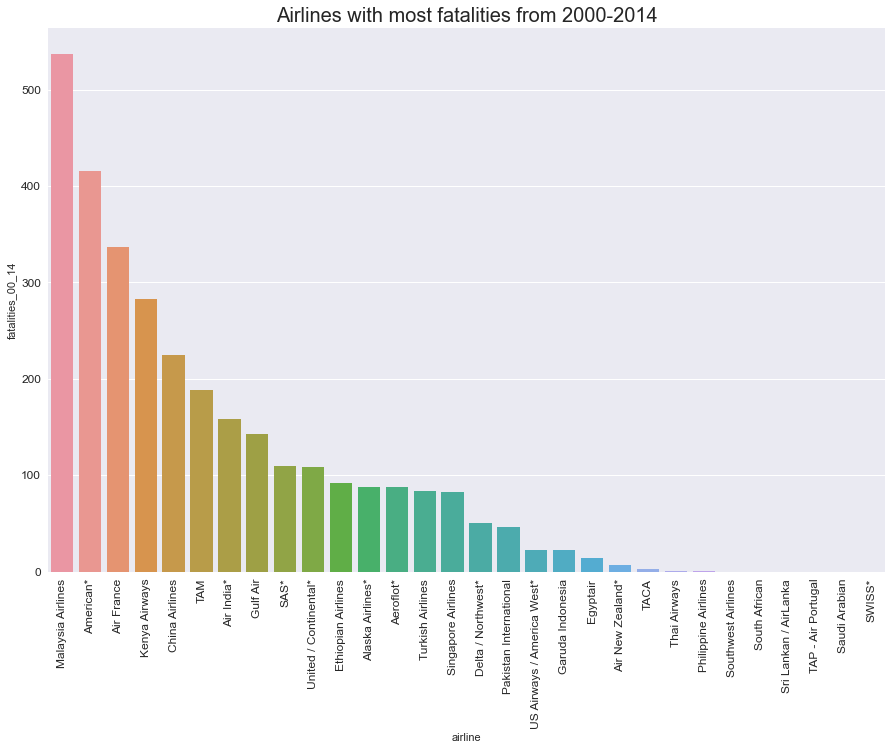

In [33]:
plt.figure(figsize=(15,10))
plt.title('Airlines with most fatalities from 2000-2014',fontsize=20)
sns.barplot(x = 'airline',y = 'fatalities_00_14', data = fatal_inc_2.head(30)) #printing first 15 highest profitable states
plt.xticks(rotation = 90 , fontsize = 12) #rotating the labels on x-axis 
plt.yticks(fontsize = 12) 
plt.show()

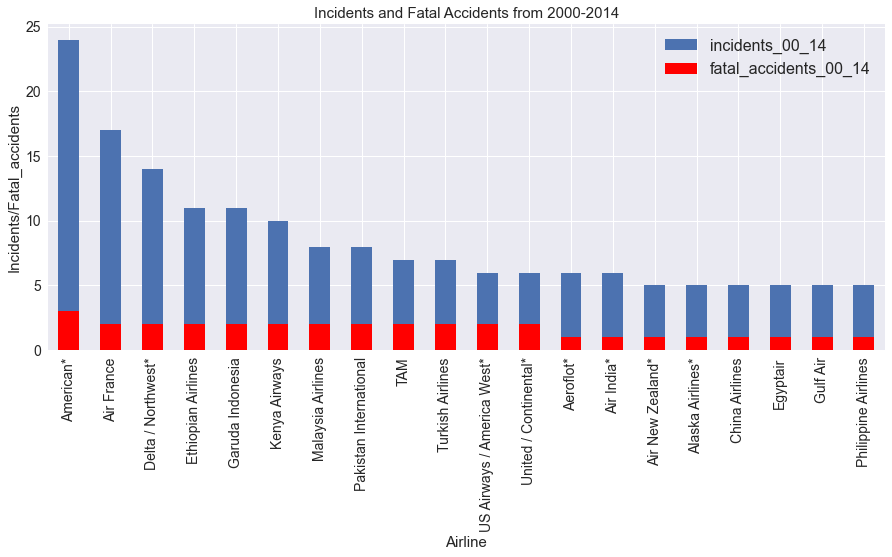

In [76]:
air_fatal_a_14 = df.groupby('airline').incidents_00_14.sum().nlargest(n=20)
air_fatal_i_14 = df.groupby("airline").fatal_accidents_00_14.sum().nlargest(n=20)

# plotting to see it visually
plt.style.use('seaborn')
air_fatal_a_14.plot(kind = 'bar',figsize = (15,6),fontsize = 14)
air_fatal_i_14.plot(kind = 'bar',figsize = (15,6),fontsize = 14,color='red')
plt.xlabel('Airline',fontsize = 15)
plt.ylabel('Incidents/Fatal_accidents',fontsize = 15)
plt.title("Incidents and Fatal Accidents from 2000-2014",fontsize = 15)
plt.legend(fontsize=16)
plt.show()

<AxesSubplot:>

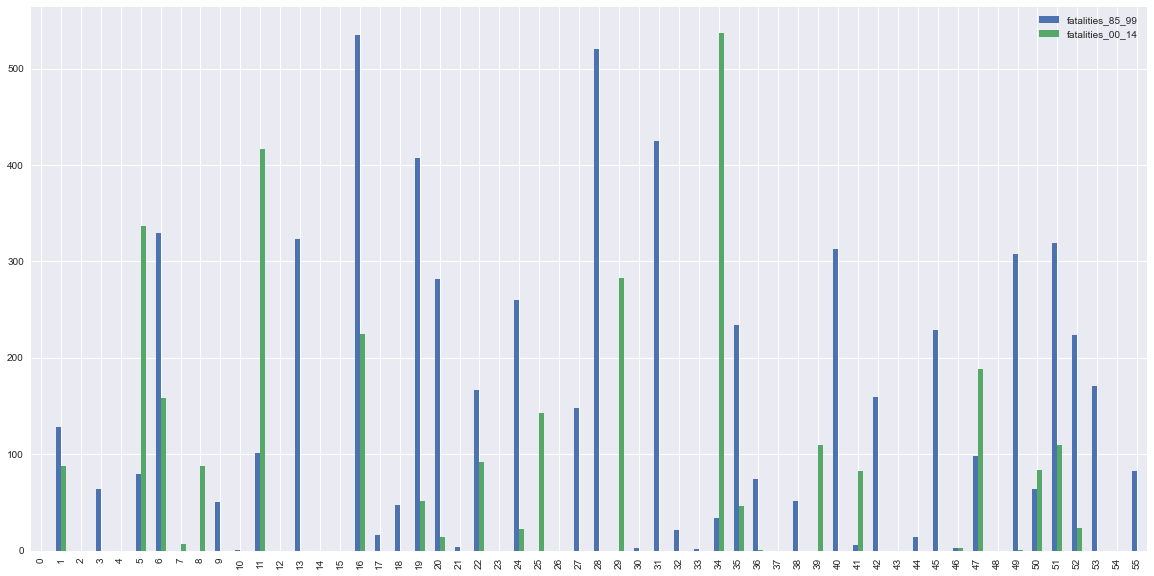

In [42]:
# plt.figure(figsize=(20,10))
df[['fatalities_85_99','fatalities_00_14']].plot.bar(figsize=(20,10))

<AxesSubplot:>

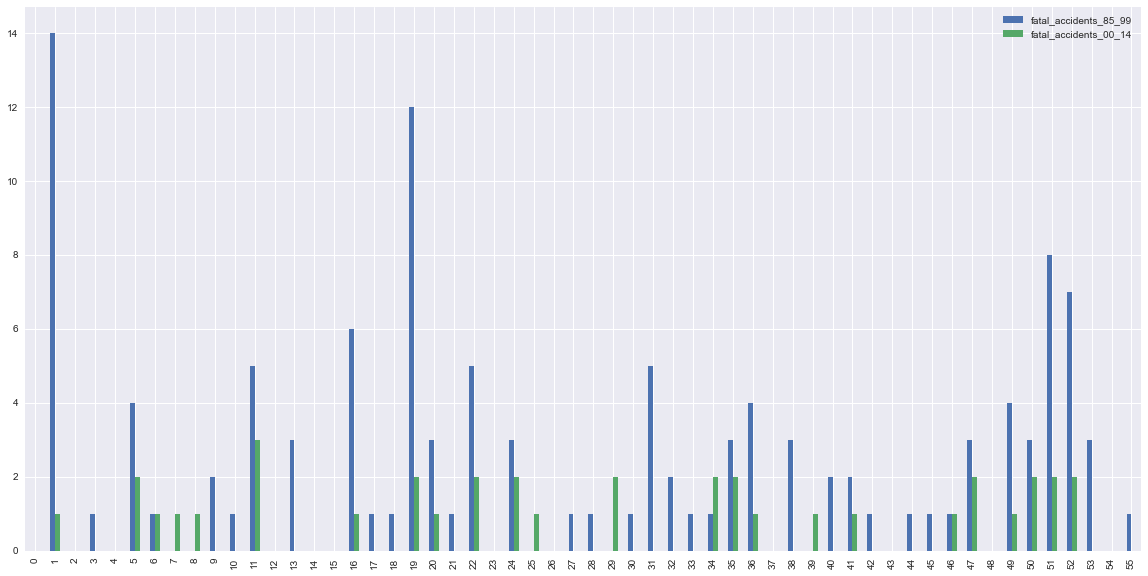

In [89]:
df[['fatal_accidents_85_99','fatal_accidents_00_14']].plot.bar(figsize=(20,10))

<AxesSubplot:>

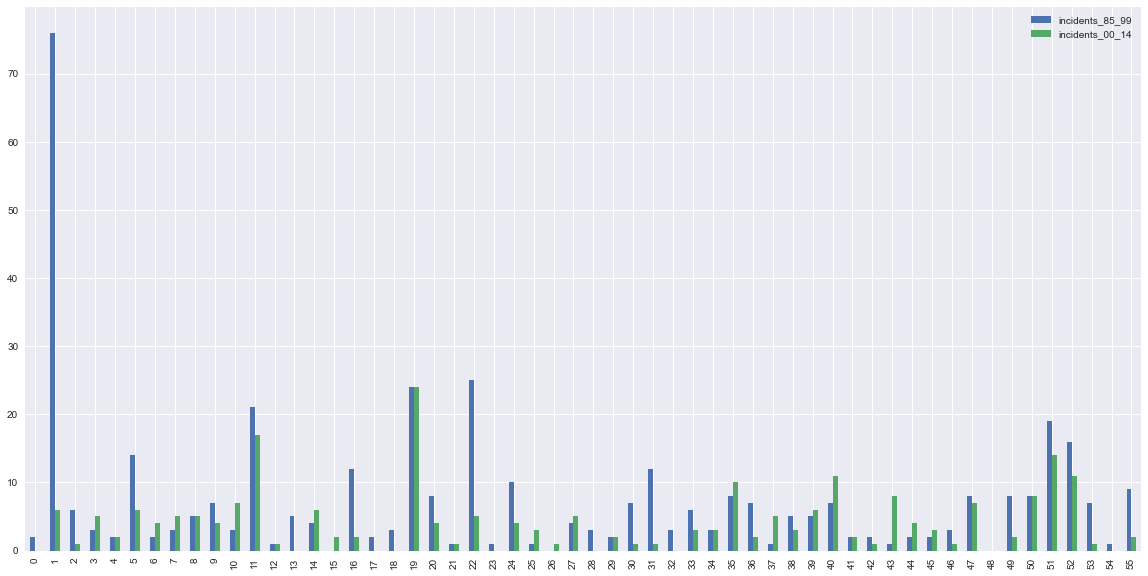

In [91]:
df[['incidents_85_99','incidents_00_14']].plot.bar(figsize=(20,10))

#### Analysis of the dataset :

**A. Km flown every week**
- The airlines with most km flown every week are : 1)United / Continental 2)Delta / Northwest 3)American
- The airlines with least km flown every week are : 1)TACA 2)Kenya Airways 3)Royal Air Maroc

**B. From 1985-1999**
1. Incidents-
- The airlines where most incidents occur are - 1)Aeroflot 2)Ethiopian Airlines 3)Delta / Northwest*
- The airlines where least incidents occur are - Southwest Airlines,Virginic Atlantic,Gulf Air,Finnair
- The airlines where no incidents occur are - Hawaiian Airlines,Cathay Pacific,TAP-Air Portugal

2. Fatal accidents
- The airlines where most fatal acccidents occur are - 1)Aeroflot 2)Delta / Northwes 3)United / Continental*
- The airlines where least fatal acccidents occur are - Condor,Copa,KLM (with only 1 fatal accident)
- The airlines where no fatal acccidents occur are - Kenya Airways,Virgin Atlantic,TAP - Air Portugal,Hawaiian Airlines(14 more)

3. Fatalities 
- The airlines with most fatalities are - 1)China Airlines 2)Japan Airlines 3)Korean Air
- The airlines with least fatalities are - KLM,Luftansa,All Nippon Airways 
- The airlines with no fatalities are - Air Canada,Virgin Atlantic,TAP - Air Portugal,Hawaiian Airlines(14 more)

**C. From 2000-2014**
1. Incidents-
- The airlines where most incidents occur are - 1)Delta / Northwest 2)American 3)United / Continental
- The airlines where least incidents occur are - 1)Vietnam Airlines 2)Austrian Airlines 3) Korean Air 4)KLM
- The airlines where no incidents occur are - Virgin Atlantic TAP,Conor,COPA,Japan Airlines(5 more)

2. Fatal accidents
- The airlines where most fatal acccidents occur are - 1)Ameriacn 2)Malaysia Airlines 3)Delta / Northwest*
- The airlines where least fatal acccidents occur are - Air india,China Airlines,Aerofloat
- The airlines where no fatal acccidents occur are - TAP,south african,Saudi Arabian(22 more)

3. Fatalities 
- The airlines with most fatalities are - 1)Malaysia Airlines 2)American 3)Air France 
- The airlines with no fatalities are - 26 airlines with no fatalities, TAP,saudi Arabian,SWISS,etc.

#### Insights drawn from the data :

- United / Continental , Delta / Northwest , American are most used Airlines.
- The no. of incidents,fatal-accidents and fatalities count are more in Delta / Northwest airline in 1985-1999 but they decreased in year 2000-2014,still this airline is in the top 10 auirlines to have more incidents.
- Fatalities and fatal accident count in airlines is reduced in 2000-2014 by more than 20%.
- Many airlines like Air Canada,Virgin Atlantic,TAP - Air Portugal managed to have lesser or no incidents, fatal_accidents and fatalities, so according to dataset they are more safe to travel.
